## Task 3: Predictive Analysis
Consider the problem of predicting for each incident (considering the whole dataset for this task) the label which is a **binary variable** that indicates if in the incident there have been at least a killed person or not.

#### 1. Indicators for classification

In [40]:
# This will take a while
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import plotly.offline as py


# Set a seed for reproducibility
np.random.seed(42)



In [41]:
# Import the datasets

# Gun incidents data
df_incidents_cleaned = pd.read_hdf('../ds/cleaned/incidents_cleaned.h5', key = 'df')

# Visualize data table
df_incidents_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 134579 entries, 218445 to 183778
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date                       134579 non-null  datetime64[ns]
 1   state                      134579 non-null  object        
 2   city_or_county             134579 non-null  object        
 3   latitude                   134579 non-null  float64       
 4   longitude                  134579 non-null  float64       
 5   congressional_district     134579 non-null  int64         
 6   participant_age1           134579 non-null  int64         
 7   participant_age_group1     134579 non-null  category      
 8   participant_gender1        134579 non-null  category      
 9   avg_age_participants       134579 non-null  int64         
 10  n_participants_child       134579 non-null  int64         
 11  n_participants_teen        134579 non-null  int

In [42]:

df_incidents_dt = df_incidents_cleaned.copy()
df_incidents_dt['n_participant_adult'] = (df_incidents_dt['n_participants'] - (df_incidents_dt['n_participants_child'] + df_incidents_dt['n_participants_teen'])).astype('int')
columns_to_drop_dt = ['longitude',
                   'latitude', 
                   'congressional_district', 
                   'participant_age1', 
                   'participant_age_group1',
                   'participant_gender1',
                   'n_participants',
                   'year',
                   'incident_characteristics1',
                   'city_or_county',
                   'date']

df_incidents_dt.drop(columns_to_drop_dt, axis = 1, inplace = True)
df_incidents_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134579 entries, 218445 to 183778
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   state                 134579 non-null  object
 1   avg_age_participants  134579 non-null  int64 
 2   n_participants_child  134579 non-null  int64 
 3   n_participants_teen   134579 non-null  int64 
 4   n_females             134579 non-null  int64 
 5   n_killed              134579 non-null  int64 
 6   n_injured             134579 non-null  int64 
 7   n_arrested            134579 non-null  int64 
 8   n_unharmed            134579 non-null  int64 
 9   n_participant_adult   134579 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 11.3+ MB


<Axes: title={'center': 'Percentage of incidents with killed people'}, ylabel='isKilled'>

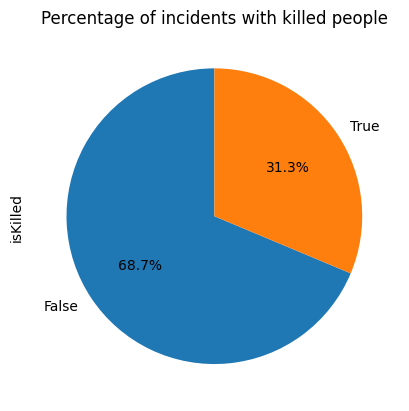

In [43]:
df_incidents_dt['isKilled'] = df_incidents_dt['n_killed'] > 0
df_incidents_dt['isKilled'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, title = 'Percentage of incidents with killed people')


### Decision Tree

In [44]:
#to classify, we first need to split the dataset into train and test dataset.
#we can do so using train_test_split, in this case we select a stratified split
from sklearn.model_selection import train_test_split
label = df_incidents_cleaned.pop('isKilled')
train_set, test_set, train_label, test_label = train_test_split(df_incidents_cleaned, label, stratify =label, test_size=0.30)

KeyError: 'isKilled'

In [ ]:
#define a decision tree and fit it
from sklearn import tree
dt = tree.DecisionTreeClassifier(criterion='gini', splitter='best', 
                                  max_depth=10, 
                                  min_samples_split=3, min_samples_leaf=4)
dt = dt.fit(train_set, train_label)

TypeError: float() argument must be a string or a real number, not 'Timestamp'

### Test DT

In [45]:
df_dt = df_incidents_dt.drop(['isKilled'], axis = 1)
df_dt = pd.get_dummies(df_dt)
df_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134579 entries, 218445 to 183778
Data columns (total 60 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   avg_age_participants        134579 non-null  int64
 1   n_participants_child        134579 non-null  int64
 2   n_participants_teen         134579 non-null  int64
 3   n_females                   134579 non-null  int64
 4   n_killed                    134579 non-null  int64
 5   n_injured                   134579 non-null  int64
 6   n_arrested                  134579 non-null  int64
 7   n_unharmed                  134579 non-null  int64
 8   n_participant_adult         134579 non-null  int64
 9   state_Alabama               134579 non-null  uint8
 10  state_Alaska                134579 non-null  uint8
 11  state_Arizona               134579 non-null  uint8
 12  state_Arkansas              134579 non-null  uint8
 13  state_California            134579 non-

In [92]:


df_dt['n_killed'].describe()


count    134579.000000
mean          0.345827
std           0.545524
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           3.000000
Name: n_killed, dtype: float64

In [116]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.discriminant_analysis import StandardScaler


target = df_incidents_dt['isKilled']
random_state = 42
test_size = 0.2
max_depth = 40
#X_train, X_test, y_train, y_test = train_test_split(df_dt, target, test_size=test_size, random_state=random_state)
train_set, test_set, train_label, test_label = train_test_split(df_dt, target, stratify =target, test_size=0.30)
train_set_cplumns = train_set.columns
scaler = StandardScaler()
train_set = scaler.fit_transform(train_set)

In [117]:
#define a decision tree and fit it
from sklearn import tree
dt = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', 
                                  max_depth=20, 
                                  min_samples_split=50, min_samples_leaf=20)
dt = dt.fit(train_set, train_label)

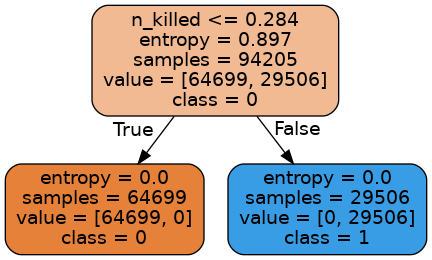

In [118]:
#visualize the actual decision tree obtained 
import pydotplus 
from IPython.display import Image  
dot_data = tree.export_graphviz(dt, out_file=None, 
                         feature_names=list(train_set_cplumns),  
                         class_names=['0', '1'],  
                         filled=True, rounded=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [119]:
#predict using the decision tree
#the predict function returns the actual predicted labels: we need them for the evaluation phase
train_pred_dt = dt.predict(train_set)
test_pred_dt = dt.predict(test_set)

/home/luca/.local/lib/python3.10/site-packages/sklearn/base.py:457: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names



In [120]:
#evaulate the accuracy on the train set and the test set
#metrics also contains precision, recall, f1 and the support
from sklearn import metrics
print('Accuracy train set ', metrics.accuracy_score(train_label, train_pred_dt))
print('Accuracy test set ', metrics.accuracy_score(test_label, test_pred_dt))
print('Precision train set ', metrics.precision_score(train_label, train_pred_dt, average='weighted'))
print('Recall train set ', metrics.recall_score(train_label, train_pred_dt, average='weighted'))
print('F1 score train set ', metrics.f1_score(train_label, train_pred_dt, average='weighted'))
print('Support train set ', metrics.precision_recall_fscore_support(train_label, train_pred_dt))

Accuracy train set  1.0
Accuracy test set  1.0
Precision train set  1.0
Recall train set  1.0
F1 score train set  1.0
Support train set  (array([1., 1.]), array([1., 1.]), array([1., 1.]), array([64699, 29506]))


In [121]:
#metrics computed on the test set
from sklearn.metrics import classification_report
def report_scores(test_label, test_pred):
    print(classification_report(test_label, 
                            test_pred, 
                            target_names=['0', '1']))

In [122]:
report_scores(test_label, test_pred_dt)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27729
           1       1.00      1.00      1.00     12645

    accuracy                           1.00     40374
   macro avg       1.00      1.00      1.00     40374
weighted avg       1.00      1.00      1.00     40374

